In [1]:
import sys
import random
import numpy as np

from LawnRakeGame import *

import matplotlib.pyplot as plt

%matplotlib inline

down: 0, 

up: 1, 

left: 2, 

right: 3

In [2]:
config = {'m': 20, 
          'n': 30, 
          'cell_capacity': 100, 
          'initial_seed': 10, 
          'random_seed': False,
          'init_x': 0, 
          'init_y': 0, 
          'move_reward': -0.1, 
          'initial_energy':100000.,
          'rake_success_rate': 0.7, 
          'rake_capacity': 30, 
          'rake_reward': -1.,
          'collect_success_rate': 0.8, 
          'collect_capacity': 50., 
          'collect_reward': [-10., 1.]
         }

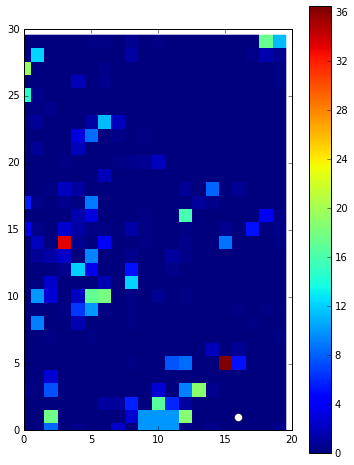

In [39]:
N = 20000

lawn = Lawn(config)
robot = Robot(config)
rake = Rake(config)
collect = Collect(config)

actions = ['move', 'rake', 'collect']
directions = [0, 1, 2, 3]

energy = [0] * N
reward = [0] * N
for i in range(N):
    action = random.choice(actions)
    direction = random.choice(directions)

    if action == 'move':
        reward[i] = robot.move(direction)
    elif action == 'rake':
        reward[i] = rake.rake(robot, lawn, direction)
    elif action == 'collect':
        reward[i] = collect.collect(robot, lawn)

    energy[i] = robot.energy

plot_lawn(lawn, robot)

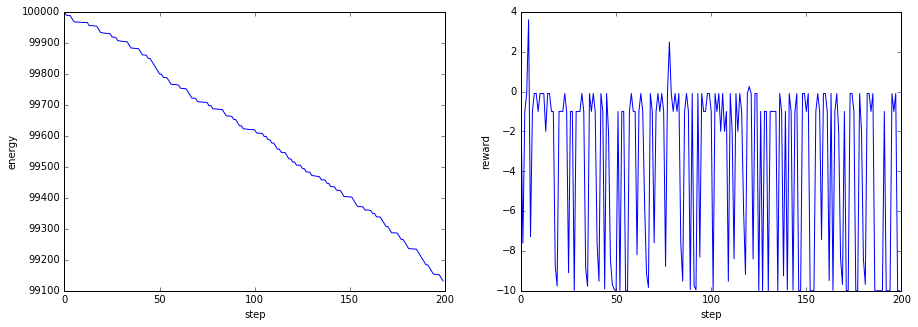

In [36]:
plt.figure(figsize=(15, 5))

plt.subplot('121')
plt.plot(energy[:200])
plt.xlabel('step')
plt.ylabel('energy')
plt.subplot('122')
plt.plot(reward[:200])
plt.xlabel('step')
plt.ylabel('reward')

plt.show()